In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__

'2.12.0'

In [2]:
credit = pd.read_csv('credit.csv')
credit_numpy = credit.to_numpy()
credit.head()

,0,1,2,3
0,2.0,1.0,24.0,3913.0
1,2.0,2.0,26.0,2682.0
2,2.0,2.0,34.0,29239.0
3,2.0,1.0,37.0,46990.0
4,2.0,1.0,57.0,8617.0


In [3]:
# Convert the credit_numpy array into  a tensorflow constant
credit_constant = tf.constant(credit_numpy)

# Print constant datatype
print('The datatype is:', credit_constant.dtype)

# Print constant shape
print('The shape is:', credit_constant.shape)

The datatype is: <dtype: 'float64'>
The shape is: (30000, 4)


In [4]:
# Detine the 1-dimensional variable A1
A1 = tf.Variable([1, 2, 3, 4])

# Print the variable A1
print(A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]


In [5]:
# Define tensors A1 and A23 as constants
A1 = tf.constant([1, 2, 3, 4])
A23 = tf.constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

# Perform element-wise multiplication
C1 = tf.multiply(A1, B1)
C23 = tf.multiply(A23, B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


In [6]:
# Define features, params, and bill as constants
features = tf.constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = tf.constant([[1000], [150]])
bill = tf.constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = tf.matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


In [7]:
wealth = tf.constant([[11, 50], [7, 2], [4, 60], [3, 0], [25, 10]])

In [8]:
tf.reduce_sum(wealth)

<tf.Tensor: shape=(), dtype=int32, numpy=172>

In [9]:
tf.reduce_sum(wealth, 1)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([61,  9, 64,  3, 35])>

In [11]:
gray_tensor = pd.read_csv('gray_tensor.csv').to_numpy()

color_tensor = pd.read_csv('color_tensor.csv').to_numpy().reshape(28, 28, 3)

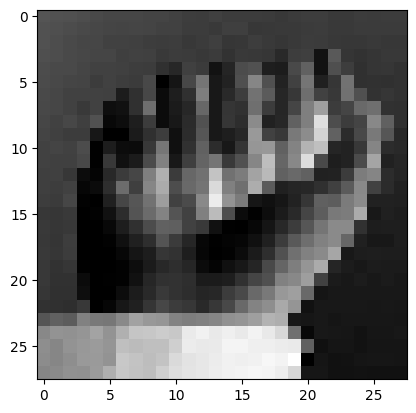

In [12]:
import matplotlib.pyplot as plt

plt.imshow(gray_tensor, cmap=plt.cm.binary);
# plt.imshow(image, interpolation='nearest')

In [13]:
# Reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = tf.reshape(color_tensor, (2352, 1))

In [14]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = tf.Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = x * x
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


In [15]:
letter = np.array([[1.0, 0, 1.0], [1., 1., 0], [1., 0, 1.] ])
model = np.array([[1., 0., -1.]])

In [16]:
# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0
